Importing data and libraries

In [74]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

Finding best features

In [75]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [4]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

Train Test split

In [4]:
from sklearn.model_selection import train_test_split
X = X[['ram','px_height','battery_power','px_width']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

Support vector machines

In [66]:
from sklearn.svm import SVC
svc = SVC(decision_function_shape = 'ovo',C = 1,gamma = 0.001,kernel = 'linear')

Training

In [67]:
svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Finding accuracy

In [68]:
svc.score(X_test,y_test)

0.95

Plotting our error

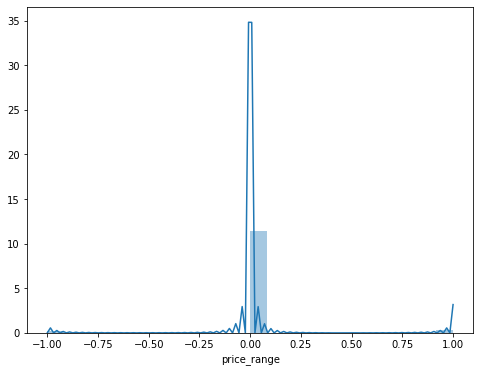

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
predict = svc.predict(X_test)
plt.figure(figsize = (8,6))
sns.distplot(y_test - predict)

It seems some of the features are misclassified to a 1 higher class.But we got overall accuracy of 95%